In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv("Sales_January_2019_date.csv")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order,Unnamed: 5,Time,Purchase Address,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Date
0,147268,Wired Headphones,1,11.99,01-01-2019,NaN,03:07:00,"944 Walnut St, Boston, MA 02215",NaN,NaN,NaN,NaN,01/01/19
1,148041,USB-C Charging Cable,1,11.95,01-01-2019,NaN,03:40:00,"185 Maple St, Portland, OR 97035",NaN,NaN,NaN,NaN,01/01/19
2,149343,Apple Airpods Headphones,1,150.00,01-01-2019,NaN,04:56:00,"538 Adams St, San Francisco, CA 94016",NaN,NaN,NaN,NaN,01/01/19
3,149964,AAA Batteries (4-pack),1,2.99,01-01-2019,NaN,05:53:00,"738 10th St, Los Angeles, CA 90001",NaN,NaN,NaN,NaN,01/01/19
4,149350,USB-C Charging Cable,2,11.95,01-01-2019,NaN,06:03:00,"387 10th St, Austin, TX 73301",NaN,NaN,NaN,NaN,01/01/19


In [24]:
cols_to_drop = ['Unnamed: 5', 'Unnamed: 8', 'Unnamed: 9','Unnamed: 10','Unnamed: 11','Order']
df.drop(columns=cols_to_drop, inplace=True)

In [25]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Time,Purchase Address,Date
0,147268,Wired Headphones,1,11.99,03:07:00,"944 Walnut St, Boston, MA 02215",01/01/19
1,148041,USB-C Charging Cable,1,11.95,03:40:00,"185 Maple St, Portland, OR 97035",01/01/19
2,149343,Apple Airpods Headphones,1,150.00,04:56:00,"538 Adams St, San Francisco, CA 94016",01/01/19
3,149964,AAA Batteries (4-pack),1,2.99,05:53:00,"738 10th St, Los Angeles, CA 90001",01/01/19
4,149350,USB-C Charging Cable,2,11.95,06:03:00,"387 10th St, Austin, TX 73301",01/01/19


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9681 entries, 0 to 9680
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order ID          9681 non-null   int64  
 1   Product           9681 non-null   object 
 2   Quantity Ordered  9681 non-null   int64  
 3   Price Each        9681 non-null   float64
 4   Time              9681 non-null   object 
 5   Purchase Address  9655 non-null   object 
 6   Date              9681 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 529.6+ KB


In [27]:
df.describe()

,Order ID,Quantity Ordered,Price Each
count,9681.000000,9681.000000,9681.000000
mean,145859.984816,1.122611,186.449092
std,2674.333362,0.442273,330.799693
min,141234.000000,1.000000,2.990000
25%,143541.000000,1.000000,11.950000
50%,145852.000000,1.000000,14.950000
75%,148173.000000,1.000000,150.000000
max,150501.000000,7.000000,1700.000000


In [28]:
from datetime import datetime
import calendar

# Creating a copy of Data-Frame
df2 = df

In [29]:
parts = df["Date"].str.split("/", n = 3, expand = True)
df2["month"]= parts[0].astype('int')
df2["day"]= parts[1].astype('int')
df2["year"]= ("20"+parts[2]).astype('int')

In [30]:
def weekend_or_weekday(year,month,day):
      
    d = datetime(year,month,day)
    if d.weekday()>4:
        return 1
    else:
        return 0
  
df2['weekend'] = df2.apply(lambda x:weekend_or_weekday(x['year'], x['month'], x['day']), axis=1)
df2.head()

,Order ID,Product,Quantity Ordered,Price Each,Time,Purchase Address,Date,month,day,year,weekend
0,147268,Wired Headphones,1,11.99,03:07:00,"944 Walnut St, Boston, MA 02215",01/01/19,1,1,2019,0
1,148041,USB-C Charging Cable,1,11.95,03:40:00,"185 Maple St, Portland, OR 97035",01/01/19,1,1,2019,0
2,149343,Apple Airpods Headphones,1,150.00,04:56:00,"538 Adams St, San Francisco, CA 94016",01/01/19,1,1,2019,0
3,149964,AAA Batteries (4-pack),1,2.99,05:53:00,"738 10th St, Los Angeles, CA 90001",01/01/19,1,1,2019,0
4,149350,USB-C Charging Cable,2,11.95,06:03:00,"387 10th St, Austin, TX 73301",01/01/19,1,1,2019,0


In [31]:
import holidays

def is_holiday(x):
    
  india_holidays = holidays.country_holidays('IN')
  
  if india_holidays.get(x):
    return 1
  else:
    return 0
  
df2['holidays'] = df2['Date'].apply(is_holiday)
df2.head()

,Order ID,Product,Quantity Ordered,Price Each,Time,Purchase Address,Date,month,day,year,weekend,holidays
0,147268,Wired Headphones,1,11.99,03:07:00,"944 Walnut St, Boston, MA 02215",01/01/19,1,1,2019,0,0
1,148041,USB-C Charging Cable,1,11.95,03:40:00,"185 Maple St, Portland, OR 97035",01/01/19,1,1,2019,0,0
2,149343,Apple Airpods Headphones,1,150.00,04:56:00,"538 Adams St, San Francisco, CA 94016",01/01/19,1,1,2019,0,0
3,149964,AAA Batteries (4-pack),1,2.99,05:53:00,"738 10th St, Los Angeles, CA 90001",01/01/19,1,1,2019,0,0
4,149350,USB-C Charging Cable,2,11.95,06:03:00,"387 10th St, Austin, TX 73301",01/01/19,1,1,2019,0,0


In [32]:
df2.dropna()

,Order ID,Product,Quantity Ordered,Price Each,Time,Purchase Address,Date,month,day,year,weekend,holidays
0,147268,Wired Headphones,1,11.99,03:07:00,"944 Walnut St, Boston, MA 02215",01/01/19,1,1,2019,0,0
1,148041,USB-C Charging Cable,1,11.95,03:40:00,"185 Maple St, Portland, OR 97035",01/01/19,1,1,2019,0,0
2,149343,Apple Airpods Headphones,1,150.00,04:56:00,"538 Adams St, San Francisco, CA 94016",01/01/19,1,1,2019,0,0
3,149964,AAA Batteries (4-pack),1,2.99,05:53:00,"738 10th St, Los Angeles, CA 90001",01/01/19,1,1,2019,0,0
4,149350,USB-C Charging Cable,2,11.95,06:03:00,"387 10th St, Austin, TX 73301",01/01/19,1,1,2019,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9676,142484,Wired Headphones,1,11.99,23:29,"625 Pine St, New York City, NY 10001",01/31/19,1,31,2019,0,0
9677,144989,AAA Batteries (4-pack),1,2.99,23:29,"717 Walnut St, New York City, NY 10001",01/31/19,1,31,2019,0,0
9678,145457,AAA Batteries (4-pack),1,2.99,23:35,"815 14th St, San Francisco, CA 94016",01/31/19,1,31,2019,0,0
9679,148209,Vareebadd Phone,1,400.00,23:35,"917 10th St, San Francisco, CA 94016",01/31/19,1,31,2019,0,0


In [33]:
sales_by_category = df2.groupby('Product')['Quantity Ordered'].sum()

In [34]:
sorted_sales_by_category = sales_by_category.sort_values(ascending=False)
print(sorted_sales_by_category)

Product
AAA Batteries (4-pack)        1596
AA Batteries (4-pack)         1425
USB-C Charging Cable          1284
Lightning Charging Cable      1151
Wired Headphones              1081
Apple Airpods Headphones       814
Bose SoundSport Headphones     659
27in FHD Monitor               419
iPhone                         379
Google Phone                   318
34in Ultrawide Monitor         314
27in 4K Gaming Monitor         312
Flatscreen TV                  243
Macbook Pro Laptop             235
ThinkPad Laptop                217
20in Monitor                   215
Vareebadd Phone                125
LG Washing Machine              42
LG Dryer                        39
Name: Quantity Ordered, dtype: int64


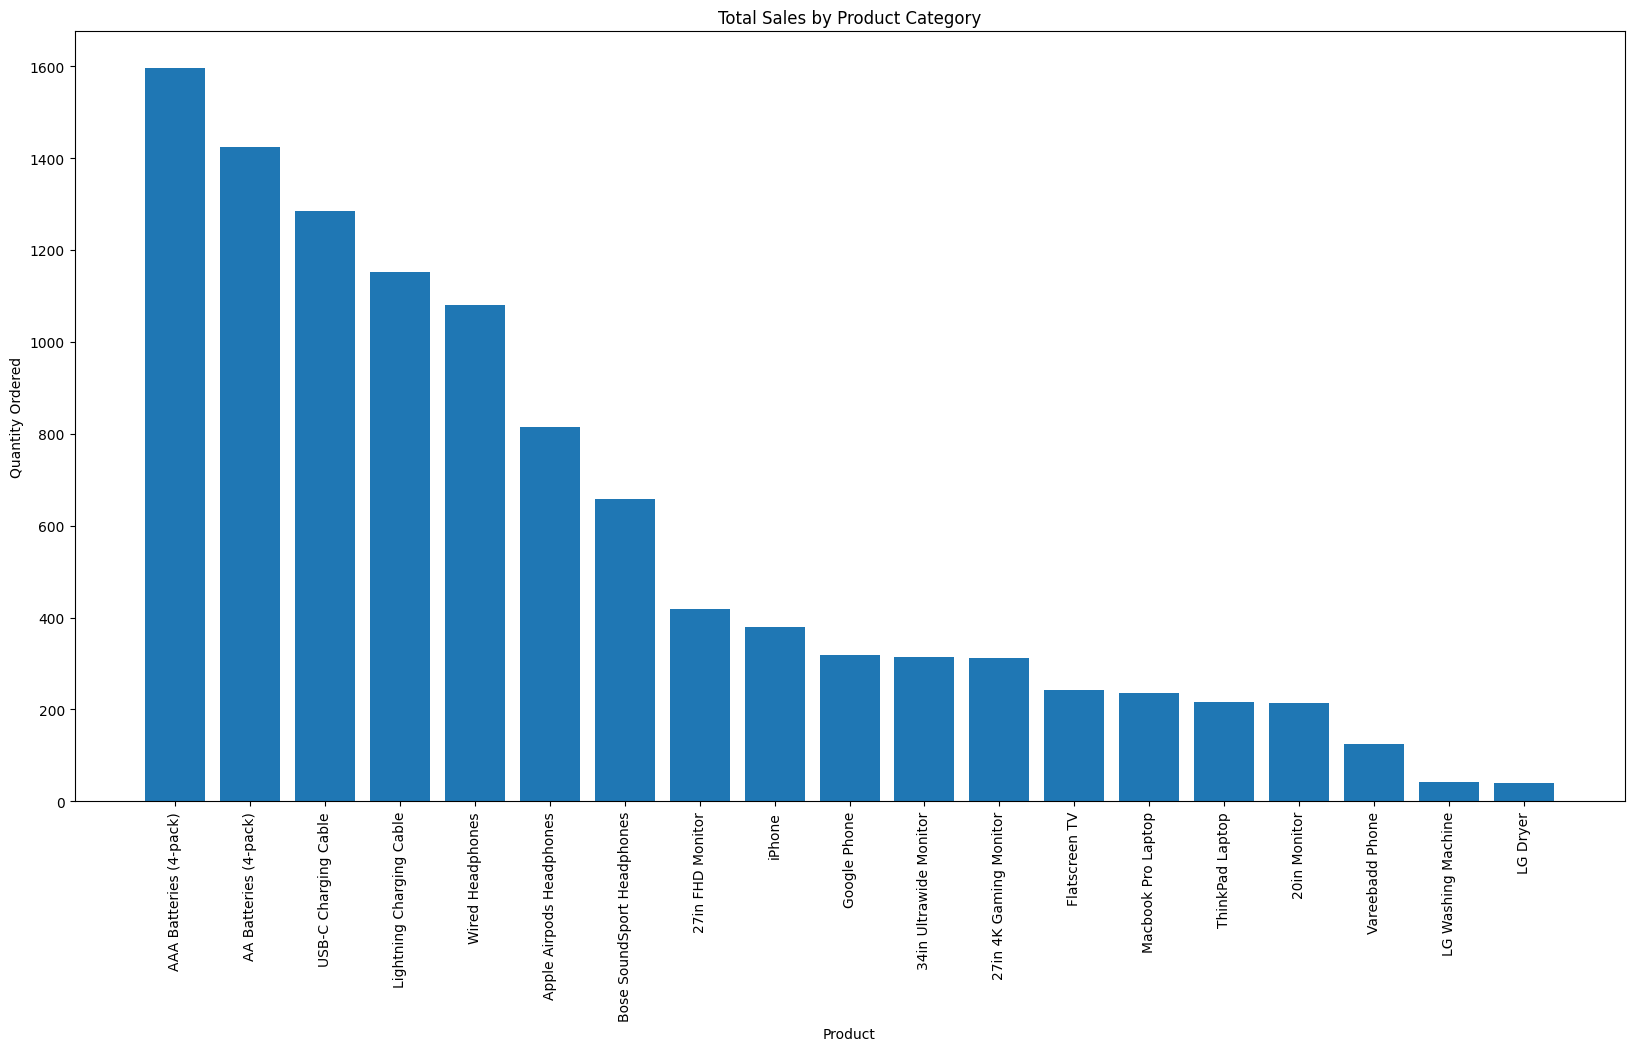

In [35]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 10))
plt.bar(sorted_sales_by_category.index, sorted_sales_by_category)
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.title('Total Sales by Product Category')
plt.xticks(rotation='vertical')
plt.show()

In [36]:
df2['m1'] = np.sin(df2['month'] * (2 * np.pi / 12))
df2['m2'] = np.cos(df2['month'] * (2 * np.pi / 12))
df2.head()

,Order ID,Product,Quantity Ordered,Price Each,Time,Purchase Address,Date,month,day,year,weekend,holidays,m1,m2
0,147268,Wired Headphones,1,11.99,03:07:00,"944 Walnut St, Boston, MA 02215",01/01/19,1,1,2019,0,0,0.5,0.866025
1,148041,USB-C Charging Cable,1,11.95,03:40:00,"185 Maple St, Portland, OR 97035",01/01/19,1,1,2019,0,0,0.5,0.866025
2,149343,Apple Airpods Headphones,1,150.00,04:56:00,"538 Adams St, San Francisco, CA 94016",01/01/19,1,1,2019,0,0,0.5,0.866025
3,149964,AAA Batteries (4-pack),1,2.99,05:53:00,"738 10th St, Los Angeles, CA 90001",01/01/19,1,1,2019,0,0,0.5,0.866025
4,149350,USB-C Charging Cable,2,11.95,06:03:00,"387 10th St, Austin, TX 73301",01/01/19,1,1,2019,0,0,0.5,0.866025


In [37]:
def which_day(year, month, day):
      
    d = datetime(year,month,day)
    return d.weekday()
  
df2['weekday'] = df2.apply(lambda x: which_day(x['year'], x['month'], x['day']), axis=1)
df2.head()

,Order ID,Product,Quantity Ordered,Price Each,Time,Purchase Address,Date,month,day,year,weekend,holidays,m1,m2,weekday
0,147268,Wired Headphones,1,11.99,03:07:00,"944 Walnut St, Boston, MA 02215",01/01/19,1,1,2019,0,0,0.5,0.866025,1
1,148041,USB-C Charging Cable,1,11.95,03:40:00,"185 Maple St, Portland, OR 97035",01/01/19,1,1,2019,0,0,0.5,0.866025,1
2,149343,Apple Airpods Headphones,1,150.00,04:56:00,"538 Adams St, San Francisco, CA 94016",01/01/19,1,1,2019,0,0,0.5,0.866025,1
3,149964,AAA Batteries (4-pack),1,2.99,05:53:00,"738 10th St, Los Angeles, CA 90001",01/01/19,1,1,2019,0,0,0.5,0.866025,1
4,149350,USB-C Charging Cable,2,11.95,06:03:00,"387 10th St, Austin, TX 73301",01/01/19,1,1,2019,0,0,0.5,0.866025,1


In [42]:
df2['Product'].nunique()

19

In [43]:
df2.shape

(9681, 15)

In [44]:
df2.dtypes

Order ID              int64
Product              object
Quantity Ordered      int64
Price Each          float64
Time                 object
Purchase Address     object
Date                 object
month                 int32
day                   int32
year                  int32
weekend               int64
holidays              int64
m1                  float64
m2                  float64
weekday               int64
dtype: object

In [45]:
f'Total dates: {df2[["Date"]].nunique()[0]}'

'Total dates: 32'

In [46]:
df2 = df2.groupby('Date').sum('Quantity Ordered')
df2.index = pd.to_datetime(df2.index)
# df2 = df2.drop(['store','item'], axis=1)
df2.head()

,Order ID,Quantity Ordered,Price Each,month,day,year,weekend,holidays,m1,m2,weekday
Date,,,,,,,,,,,
2019-01-01,44021745,343,65420.91,302,302,609738,0,0,151.0,261.539672,302
2019-01-02,47185173,368,70407.84,324,648,654156,0,0,162.0,280.592231,648
2019-01-03,43159194,330,46793.74,296,888,597624,0,0,148.0,256.343520,888
2019-01-04,42839800,330,61779.51,294,1176,593586,0,0,147.0,254.611469,1176
2019-01-05,44984833,355,46160.62,308,1540,621852,308,0,154.0,266.735824,1540


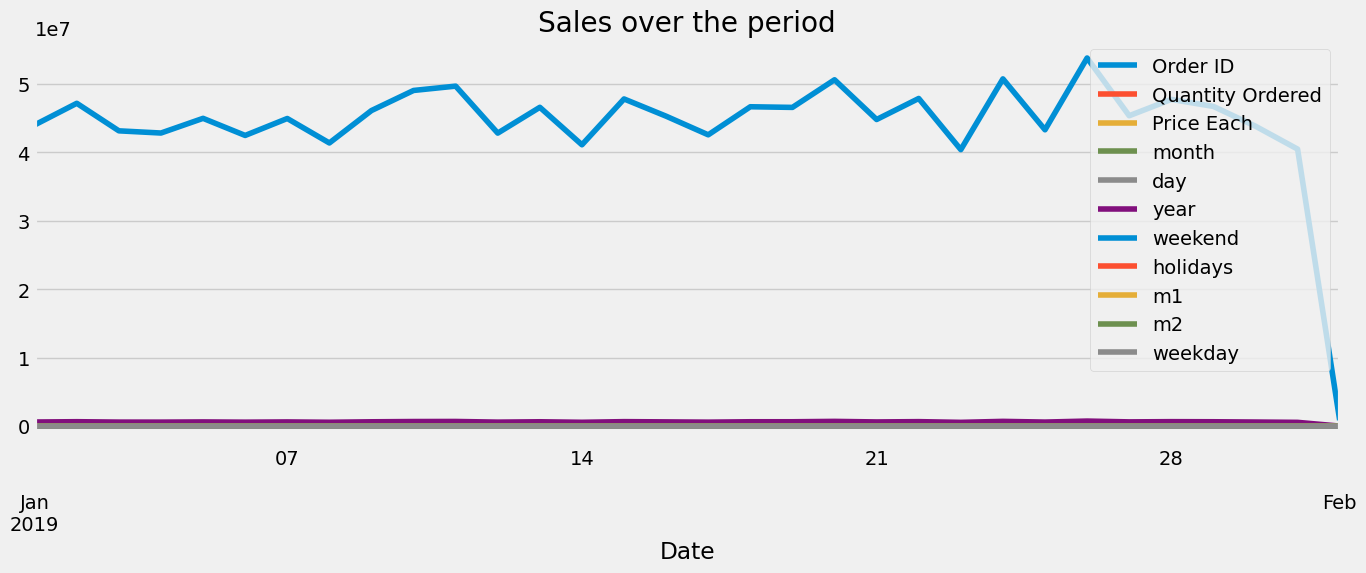

In [48]:
import seaborn as sns

color_pallet = sns.color_palette()
plt.style.use('fivethirtyeight')

df2.plot(
        # style='.',
        figsize=(15, 5),
        title='Sales over the period')
plt.show()